In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

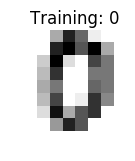

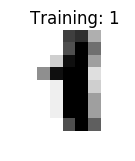

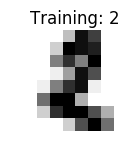

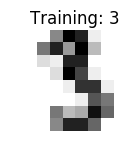

In [15]:
# load the mnist dataset
mnist_dataset = datasets.load_digits()
images_and_labels = list(zip(mnist_dataset.images, mnist_dataset.target))
for i, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()

# split into test and train and cv
X_train, X_test, y_train, y_test = model_selection.train_test_split(mnist_dataset.data, mnist_dataset.target, test_size=0.8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


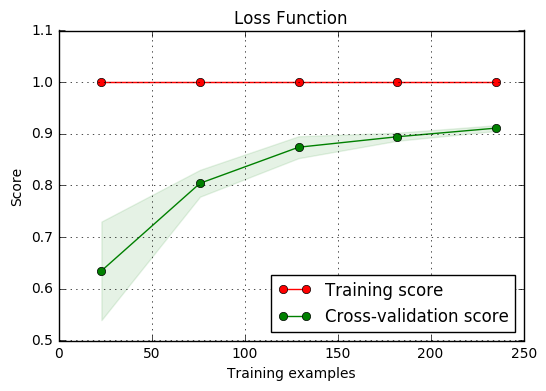

In [10]:
# fit a logistic regression model to the data 
model = LogisticRegression()
train_sizes, train_scores, test_scores = model_selection.learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1,1.0,5))
model.fit(X_train, y_train)
print(model)
plt.figure()
plt.title("Loss Function")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="lower right")
plt.show()

In [4]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# print (expected) #Actual Digits 
# print (predicted) #Model prediction 

print ("Accuracy: ", metrics.accuracy_score(y_test, predicted)*100, "%")

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

Accuracy:  93.4631432545 %
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       132
          1       0.88      0.93      0.91       148
          2       0.99      0.95      0.97       141
          3       0.90      0.96      0.93       153
          4       0.99      0.92      0.96       145
          5       0.99      0.93      0.96       152
          6       0.99      0.98      0.98       146
          7       0.96      0.96      0.96       142
          8       0.80      0.81      0.81       139
          9       0.89      0.90      0.89       140

avg / total       0.94      0.93      0.94      1438

